# Changing Times

Just a quick one. Let's try adding some jitter to a model to see how it performs after adding noise.

In [1]:
from sklearn import metrics, datasets, naive_bayes, svm, tree
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from pandas import Series
from matplotlib import pyplot

What we would expect is something like the following. If we have a model that grossly overfits the data, it is likely to start high (e.g. lookup table). Because it hasn't made any generalisations, as soon as we start adding noise performance will quickly drop.

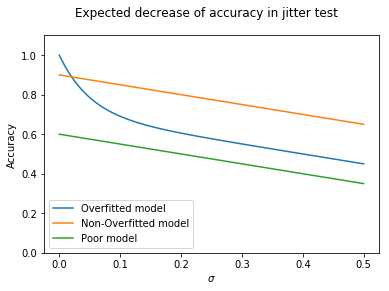

In [2]:
x = np.linspace(0, 0.5, 100)

plt.plot( x, 0.7 - 0.5*x + 0.3*np.exp(-x*20), label = "Overfitted model")
plt.plot( x, 0.9 - 0.5*x, label = "Non-Overfitted model")
plt.plot( x, 0.6 - 0.5*x, label = "Poor model")

axes = plt.gca()
axes.set_ylim([0, 1.1])

plt.legend(loc=3)
plt.suptitle("Expected decrease of accuracy in jitter test")

axes.set_xlabel('$\sigma$')
axes.set_ylabel('Accuracy')

plt.show()

## Jitter methods

"Jitter" is simply some noise added to the original signal.

Below a `jitter_test` runs a prediction on the new jitter data over several different jitter scales (standard deviations). To make the resulting curves a little smoother, we're performing the experiment several times and taking the average.

In [3]:
def jitter(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter_test(classifier, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            avg += metrics.accuracy_score(y, classifier.predict(jitter(X, s)))
        out.append(avg / N)
    return out, scales

Below we're generating the test data. We're using the moons dataset to make it quite difficult.

In [4]:
np.random.seed(1234)
X, y = datasets.make_moons(n_samples=200, noise=.3)

In [5]:
mdl1 = svm.SVC()
mdl1.fit(X, y)

mdl2 = tree.DecisionTreeClassifier()
mdl2.fit(X,y);

In [6]:
mdl1_scores, jitters = jitter_test(mdl1, X, y)
mdl2_scores, jitters = jitter_test(mdl2, X, y)

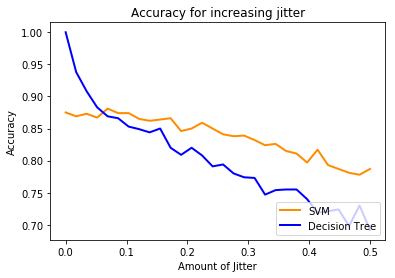

In [7]:
plt.figure()
lw = 2
plt.plot(jitters, mdl1_scores, color='darkorange',
         lw=lw, label='SVM')
plt.plot(jitters, mdl2_scores, color='blue',
         lw=lw, label='Decision Tree')
plt.xlabel('Amount of Jitter')
plt.ylabel('Accuracy')
plt.title('Accuracy for increasing jitter')
plt.legend(loc="lower right")
plt.show()

Note how the decision tree result drops quickly. This is because even though we are just shifting the original data just a tiny bit, because it's so overfitted it quickly starts to misclassify data.

Which do you think is the better model?

## Bonus

- Write some code to plot the decision boundaries of the classifiers. To do this the easiest thing is to just generate a load of random x,y coords and use the model to generate the class. Compare that to the plot above.

Hint: Take a look at some of the other workshops.

## Trends

I just wanted to show you a really cool library for decomposing seasonal trends.

It's essentially fitting the multiplicative model:

$y(t) = Level * Trend * Seasonality * Noise$

Below we have some data from the 1950's showing the number of people (monthly, in thousands) flying with an airline. You can see that there is clearly some seasonal variation.

`statsmodels` is a comprehensive statistical library. It is has some overlap with `scipy.stats`, but is far more comprehensive.

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:2849: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


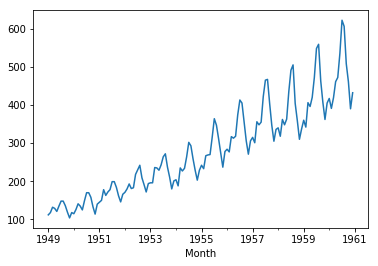

In [8]:
series = Series.from_csv('data/international-airline-passengers.csv', header=0)
series.plot()
plt.show()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


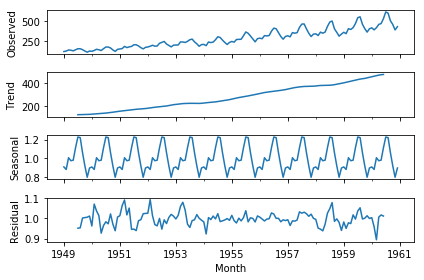

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

Note how well it de-seasonal-ises the data. After removing the seasonal variation the trend is quite consistent.